# 3
## 3.5

In [41]:
# List 3-12
%matplotlib inline

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [42]:
len(train_data)

8982

In [43]:
len(test_data)

2246

In [44]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [45]:
# List 3-13

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [46]:
train_labels[10]

3

In [47]:
# List 3-14

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [48]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

## 3.5.3

In [49]:
# List 3-15

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [50]:
# List 3-16
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## 3.5.4

In [51]:
# List 3-17

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [52]:
# List 3-18

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 102us/sample - loss: 2.7128 - acc: 0.4915 - val_loss: 1.8103 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 66us/sample - loss: 1.4719 - acc: 0.6907 - val_loss: 1.3330 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 0s 46us/sample - loss: 1.0805 - acc: 0.7633 - val_loss: 1.1426 - val_acc: 0.7500
Epoch 4/20
7982/7982 [==============================] - 0s 62us/sample - loss: 0.8452 - acc: 0.8197 - val_loss: 1.0357 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 1s 64us/sample - loss: 0.6647 - acc: 0.8607 - val_loss: 0.9509 - val_acc: 0.8100
Epoch 6/20
7982/7982 [==============================] - 0s 58us/sample - loss: 0.5244 - acc: 0.8925 - val_loss: 0.9071 - val_acc: 0.8160
Epoch 7/20
7982/7982 [==============================] - 0s 56us/sample - loss: 0.4229 - acc: 0.9138 - val_loss: 0.8842 - val_acc:

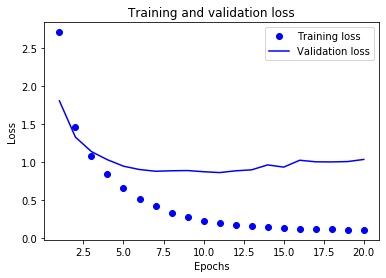

In [53]:
# List 3-19

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

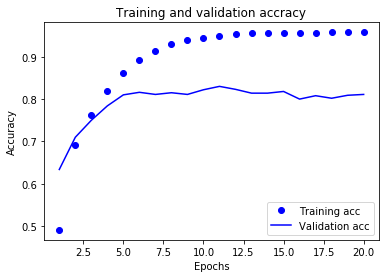

In [54]:
# List 3-20

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
# List 3-21

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 106us/sample - loss: 2.7596 - acc: 0.4825 - val_loss: 1.8564 - val_acc: 0.6190
Epoch 2/8
7982/7982 [==============================] - 1s 85us/sample - loss: 1.5245 - acc: 0.6898 - val_loss: 1.3795 - val_acc: 0.7090
Epoch 3/8
7982/7982 [==============================] - 1s 63us/sample - loss: 1.1286 - acc: 0.7576 - val_loss: 1.1789 - val_acc: 0.7430
Epoch 4/8
7982/7982 [==============================] - 0s 49us/sample - loss: 0.8920 - acc: 0.8118 - val_loss: 1.0848 - val_acc: 0.7720
Epoch 5/8
7982/7982 [==============================] - 1s 67us/sample - loss: 0.7156 - acc: 0.8498 - val_loss: 1.0033 - val_acc: 0.7880
Epoch 6/8
7982/7982 [==============================] - 0s 61us/sample - loss: 0.5807 - acc: 0.8807 - val_loss: 0.9457 - val_acc: 0.8100
Epoch 7/8
7982/7982 [==============================] - 0s 60us/sample - loss: 0.4672 - acc: 0.9029 - val_loss: 0.9345 - val_acc: 0.8050

[0.9926914196405046, 0.78183436]

In [56]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.188780053428317

## 3.5.5

In [57]:
# List 3-22

predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [58]:
np.sum(predictions[0])

1.0

In [59]:
np.argmax(predictions[0])

3

## 3.5.6

In [60]:
y_train = np.array(train_labels)
y_test  = np.array(test_labels)

In [61]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 79us/sample - loss: 2.7740 - acc: 0.4746 - val_loss: 1.8178 - val_acc: 0.6260
Epoch 2/8
7982/7982 [==============================] - 1s 64us/sample - loss: 1.4700 - acc: 0.7017 - val_loss: 1.3430 - val_acc: 0.7110
Epoch 3/8
7982/7982 [==============================] - 0s 54us/sample - loss: 1.0792 - acc: 0.7794 - val_loss: 1.1553 - val_acc: 0.7530
Epoch 4/8
7982/7982 [==============================] - 0s 47us/sample - loss: 0.8407 - acc: 0.8235 - val_loss: 1.0620 - val_acc: 0.7750
Epoch 5/8
7982/7982 [==============================] - 0s 52us/sample - loss: 0.6716 - acc: 0.8584 - val_loss: 0.9677 - val_acc: 0.8000
Epoch 6/8
7982/7982 [==============================] - 0s 44us/sample - loss: 0.5391 - acc: 0.8867 - val_loss: 0.9348 - val_acc: 0.8000
Epoch 7/8
7982/7982 [==============================] - 1s 67us/sample - loss: 0.4335 - acc: 0.9102 - val_loss: 0.9177 - val_acc: 0.8010


[1.0059738921354842, 0.77693677]

## 3.5.7

In [62]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# List 3-23
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 101us/sample - loss: 3.5632 - acc: 0.1010 - val_loss: 3.2328 - val_acc: 0.2280
Epoch 2/20
7982/7982 [==============================] - 0s 62us/sample - loss: 2.8758 - acc: 0.2276 - val_loss: 2.5434 - val_acc: 0.2630
Epoch 3/20
7982/7982 [==============================] - 0s 62us/sample - loss: 2.1668 - acc: 0.2686 - val_loss: 1.9372 - val_acc: 0.2780
Epoch 4/20
7982/7982 [==============================] - 0s 62us/sample - loss: 1.6750 - acc: 0.4609 - val_loss: 1.7263 - val_acc: 0.5510
Epoch 5/20
7982/7982 [==============================] - 0s 62us/sample - loss: 1.3845 - acc: 0.6411 - val_loss: 1.5307 - val_acc: 0.6620
Epoch 6/20
7982/7982 [==============================] - 0s 62us/sample - loss: 1.1506 - acc: 0.7221 - val_loss: 1.4496 - val_acc: 0.6820
Epoch 7/20
7982/7982 [==============================] - 0s 62us/sample - loss: 1.0101 - acc: 0.7533 - val_loss: 1.4034 - val_acc:

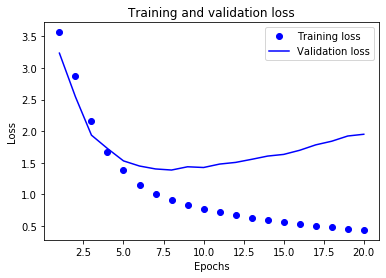

In [63]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

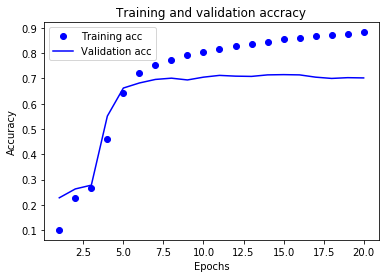

In [64]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3.5.8
### 小さい中間層

In [65]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 92us/sample - loss: 1.9423 - acc: 0.6054 - val_loss: 1.3078 - val_acc: 0.6940
Epoch 2/20
7982/7982 [==============================] - 1s 64us/sample - loss: 1.0497 - acc: 0.7705 - val_loss: 1.0956 - val_acc: 0.7410
Epoch 3/20
7982/7982 [==============================] - 1s 65us/sample - loss: 0.7434 - acc: 0.8384 - val_loss: 0.9528 - val_acc: 0.8000
Epoch 4/20
7982/7982 [==============================] - 1s 65us/sample - loss: 0.5369 - acc: 0.8864 - val_loss: 0.9020 - val_acc: 0.8110
Epoch 5/20
7982/7982 [==============================] - 1s 64us/sample - loss: 0.3915 - acc: 0.9168 - val_loss: 0.9307 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 64us/sample - loss: 0.3038 - acc: 0.9346 - val_loss: 0.8757 - val_acc: 0.8310
Epoch 7/20
7982/7982 [==============================] - 1s 64us/sample - loss: 0.2414 - acc: 0.9420 - val_loss: 0.9086 - val_acc: 

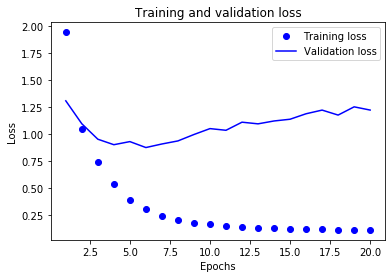

In [66]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

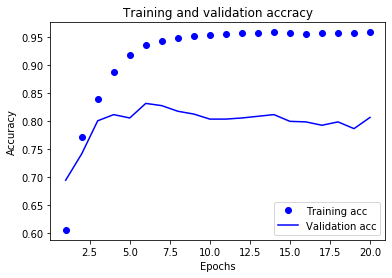

In [67]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 大きい中間層

In [68]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 99us/sample - loss: 1.7299 - acc: 0.6396 - val_loss: 1.2097 - val_acc: 0.7270
Epoch 2/20
7982/7982 [==============================] - 1s 66us/sample - loss: 0.9198 - acc: 0.8022 - val_loss: 0.9765 - val_acc: 0.8000
Epoch 3/20
7982/7982 [==============================] - 1s 66us/sample - loss: 0.5974 - acc: 0.8712 - val_loss: 0.8944 - val_acc: 0.8220
Epoch 4/20
7982/7982 [==============================] - 1s 69us/sample - loss: 0.4037 - acc: 0.9131 - val_loss: 0.9064 - val_acc: 0.8270
Epoch 5/20
7982/7982 [==============================] - 1s 67us/sample - loss: 0.2860 - acc: 0.9365 - val_loss: 0.8995 - val_acc: 0.8230
Epoch 6/20
7982/7982 [==============================] - 1s 67us/sample - loss: 0.2286 - acc: 0.9444 - val_loss: 0.9410 - val_acc: 0.8250
Epoch 7/20
7982/7982 [==============================] - 1s 65us/sample - loss: 0.1900 - acc: 0.9513 - val_loss: 0.9789 - val_acc: 

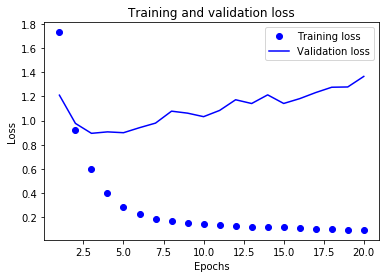

In [69]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

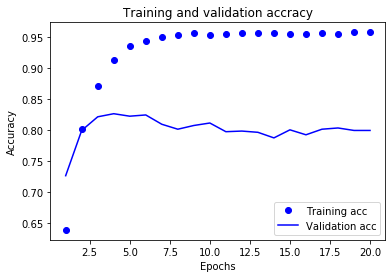

In [70]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 隠れ層を1つにする

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 103us/sample - loss: 2.5757 - acc: 0.5524 - val_loss: 1.8282 - val_acc: 0.6610
Epoch 2/20
7982/7982 [==============================] - 0s 56us/sample - loss: 1.4623 - acc: 0.7209 - val_loss: 1.3523 - val_acc: 0.7200
Epoch 3/20
7982/7982 [==============================] - 0s 59us/sample - loss: 1.0568 - acc: 0.7890 - val_loss: 1.1495 - val_acc: 0.7650
Epoch 4/20
7982/7982 [==============================] - 0s 46us/sample - loss: 0.8220 - acc: 0.8374 - val_loss: 1.0226 - val_acc: 0.7980
Epoch 5/20
7982/7982 [==============================] - 0s 43us/sample - loss: 0.6593 - acc: 0.8750 - val_loss: 0.9441 - val_acc: 0.8090
Epoch 6/20
7982/7982 [==============================] - 0s 43us/sample - loss: 0.5375 - acc: 0.8961 - val_loss: 0.8933 - val_acc: 0.8180
Epoch 7/20
7982/7982 [==============================] - 1s 67us/sample - loss: 0.4449 - acc: 0.9129 - val_loss: 0.8532 - val_acc:

In [ ]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 隠れ層を3つにする

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

In [ ]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()